In [1]:
import os
os.chdir(r'C:\Users\Overlord\Desktop\Py\SpeechAnalysis')

In [2]:
#import nltk
#from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer
from collections import defaultdict

import matplotlib.pyplot as plt
#import pandas as pd
import numpy as np
import math

import operator

#import re

# Set variable TR1902 to open Theodore Roosevelt's 1902 inaugural address.

In [3]:
TR1902= open(r'Speeches\TR_December_2_1902.txt','r').read().lower()

# Set Stopwords

In [4]:
STOPWORDS= set(stopwords.words('english'))

# Tokenize TR1902 and remove Stopwords

In [5]:
TR1902_Tok= word_tokenize(TR1902)

In [6]:
TR1902_NoStop= [i for i in TR1902_Tok if i not in STOPWORDS]

In [7]:
print(TR1902_NoStop[0:20])

['[', 'senate', 'house', 'representatives', ':', 'still', 'continue', 'period', 'unbounded', 'prosperity', '.', 'prosperity', 'creature', 'law', ',', 'undoubtedly', 'laws', 'work', 'instrumental', 'creating']


In [8]:
TR1902_sort= sorted(list(TR1902_NoStop))

In [9]:
#Setting TR1902_Tok to just the words (minus any numbers or punctuation)
TR1902_sort= TR1902_sort[776:len(TR1902_sort)]

In [10]:
print(TR1902_sort[0:10],'\n\n',TR1902_sort[len(TR1902_sort)-10:len(TR1902_sort)])

['abandon', 'abandoning', 'abandonment', 'ability', 'ability', 'able', 'aboard', 'abroad', 'abroad', 'abroad'] 

 ['years', 'yet', 'yet', 'yet', 'yet', 'yet', 'yet', 'young', 'young', 'young']


# Bag of words

In [11]:
words= []
for i in TR1902_sort:
    if i not in words:
        words.append(i)

In [12]:
print(len(words))
print(len(words)/2)

2089
1044.5


In [13]:
count= [0 for i in range(len(words))]

for i in TR1902_sort:
    if i in words:
        count[words.index(i)]= count[words.index(i)] + 1

In [14]:
count_mean= sum(count)/len(count)

count_sort= sorted(list(count))
count_median= [count_sort[int(len(count_sort)/2-.5)],count_sort[int(len(count_sort)/2+.5)]]

print(count_mean,'\n\n',count_median)

2.214935375777884 

 [1, 1]


In [15]:
BOW= list(zip(words,count))
print(BOW[0:10],'\n\n',BOW[len(BOW)-10:len(BOW)])

[('abandon', 1), ('abandoning', 1), ('abandonment', 1), ('ability', 2), ('able', 1), ('aboard', 1), ('abroad', 3), ('abroad.i', 1), ('absolute', 1), ('absolutely', 1)] 

 [('wrest', 1), ('wrong', 2), ('wrongdoer', 1), ('wrongdoers', 1), ('wrongdoing', 2), ('year', 7), ('yearly', 2), ('years', 5), ('yet', 6), ('young', 3)]


# Look into most common words

In [16]:
#test= [BOW for i in range()]

In [17]:
tops= [BOW[i] for i in range(0,len(BOW)) if BOW[i][1] >= 4]

tops_word= [tops[i][0] for i in range(0,len(tops))]
tops_count= [tops[i][1] for i in range(0,len(tops))]
tops_count_RA= np.asarray(tops_count)

print(len(tops),'\n\n',tops)

283 

 [('absorption', 4), ('accomplished', 4), ('act', 6), ('action', 9), ('actual', 5), ('additional', 7), ('advance', 5), ('advantage', 8), ('alaska', 6), ('alike', 5), ('allowed', 4), ('alone', 4), ('already', 7), ('also', 11), ('always', 5), ('american', 5), ('among', 10), ('amount', 6), ('army', 7), ('attention', 6), ('available', 4), ('bad', 4), ('become', 10), ('best', 5), ('better', 10), ('bill', 4), ('building', 6), ('business', 19), ('cable', 13), ('canal', 7), ('capital', 10), ('careful', 4), ('case', 7), ('century', 5), ('certain', 6), ('change', 6), ('changes', 9), ('character', 4), ('civil', 5), ('civilized', 4), ('come', 6), ('commerce', 9), ('commercial', 6), ('commission', 4), ('company', 8), ('conditions', 20), ('conduct', 4), ('congress', 35), ('consideration', 13), ('continue', 4), ('corporation', 4), ('corporations', 14), ('could', 9), ('country', 29), ('course', 6), ('cuba', 5), ('cut', 4), ('dealing', 5), ('demand', 5), ('department', 8), ('desirable', 5), ('dev

In [18]:
test= [tops[i] for i in range(0,len(tops)) if tops[i][1] <= 19 & tops[i][1] >= 16]
print(test)

[('business', 19), ('government', 16), ('may', 19), ('system', 19), ('tariff', 18)]


In [19]:
count= [i[1] for i in tops]

count_mean= sum(count)/len(count)

count_sort= sorted(list(count))
count_median= [count_sort[int(len(count_sort)/2-.5)],count_sort[int(len(count_sort)/2+.5)]]

print('Mean: ',count_mean,'\n')
print('Median= ',count_median,'\n')
print('Max: ',max(count),'\n')
print('Min: ', min(count))

Mean:  7.5477031802120145 

Median=  [6, 6] 

Max:  36 

Min:  4


# Determine sections of speech
Use concentrations of words to determine themes or subjects within certain sections of the speech.
"Alaska" (n=6) is a good place to start.

In [20]:
def get_indices(text,word):
    for i in range(0,len(text)):
        if text[i] == word:
            return i

In [21]:
indices= [i for i in range(0,len(TR1902_NoStop)) if TR1902_NoStop[i]=="alaska"]

In [22]:
print(indices)

[4469, 4473, 4518, 4557, 4604, 4614]


In [23]:
indices_dif= [indices[i] - indices[i+1] for i in range(0,len(indices)-1)]
print(indices_dif)

print(np.mean(indices))

indices_stdev= np.std(indices)
print(indices_stdev)

indices_dif_stdev= np.std(indices_dif)
print(indices_dif_stdev)

[-4, -45, -39, -47, -10]
4539.16666667
57.5482889021
18.2537667346



Now to try a more commonly used word. "Possible" (n= 14), is a good example.


In [24]:
indices= [i for i in range(0,len(TR1902_NoStop)) if TR1902_NoStop[i]=="possible"]
print(indices)

[22, 692, 1365, 1918, 2335, 2354, 2382, 2458, 3548, 3713, 3716, 4089, 4694, 5332]


In [25]:
indices_dif= [indices[i] - indices[i+1] for i in range(0,len(indices)-1)]
print(indices_dif)

print(np.mean(indices))

indices_stdev= np.std(indices)
print(indices_stdev)

indices_dif_stdev= np.std(indices_dif)
print(indices_dif_stdev)

[-670, -673, -553, -417, -19, -28, -76, -1090, -165, -3, -373, -605, -638]
2758.42857143
1453.38622899
321.899319039



It's apparent that "possible" is much less of an indicator as to the subject of a section (stdev= 321.90) than "Alaska" (stdev= 57.55).


Now to get indices for all words in our NoStop Tokens.

In [26]:
indices= []
for j in range(0,len(tops)):
    store= []
    for i in range(0,len(TR1902_NoStop)):
        if TR1902_NoStop[i] == tops[j][0]:
            store.append(i)
    indices.append(store)
print(indices[0:5])

[[4622, 4628, 4761, 4849], [556, 1321, 1782, 2492], [475, 1973, 2660, 3310, 5156, 5161], [269, 530, 536, 1419, 2654, 2666, 2794, 3418, 4071], [3251, 4029, 4255, 4277, 4548]]


Now that we have the indices, we can measure each words proximity to itself using the Standard Deviation of the indices.

In [27]:
indices_stdev= [np.std(i) for i in indices]
indices_stdev_RA= np.asarray(indices_stdev)

To keep everything together, we'll add all of the numbers together in a list and then add this "num_list" to a dictionary with the key being the affiliated term

In [28]:
num_list= list(zip(tops_count,indices_stdev,indices))

indices_dict= dict(zip(tops_word,num_list))
print(indices_dict)

{'absorption': (4, 95.249671915445461, [4622, 4628, 4761, 4849]), 'accomplished': (4, 703.75150976747466, [556, 1321, 1782, 2492]), 'act': (6, 1676.8161050037659, [475, 1973, 2660, 3310, 5156, 5161]), 'action': (9, 1309.1740398689039, [269, 530, 536, 1419, 2654, 2666, 2794, 3418, 4071]), 'actual': (5, 442.2623655704835, [3251, 4029, 4255, 4277, 4548]), 'additional': (7, 1356.6526483087944, [1406, 1589, 3560, 3753, 4077, 4745, 5203]), 'advance': (5, 1793.5537237562748, [39, 2076, 3931, 4666, 4689]), 'advantage': (8, 1207.3010964544014, [1025, 1352, 2297, 2432, 2521, 2529, 3278, 5252]), 'alaska': (6, 57.54828890206516, [4469, 4473, 4518, 4557, 4604, 4614]), 'alike': (5, 459.82822879853734, [700, 1049, 1671, 1798, 1862]), 'allowed': (4, 526.30908219410389, [3221, 4334, 4343, 4572]), 'alone': (4, 1377.3477002921231, [482, 600, 2984, 3547]), 'already': (7, 897.57748798573118, [1397, 1665, 2067, 2434, 2537, 3411, 4145]), 'also': (11, 1319.8051133368451, [343, 1447, 2140, 2246, 2524, 2686, 31

# Plot the findings

The first plot is frequency to proximity of words.

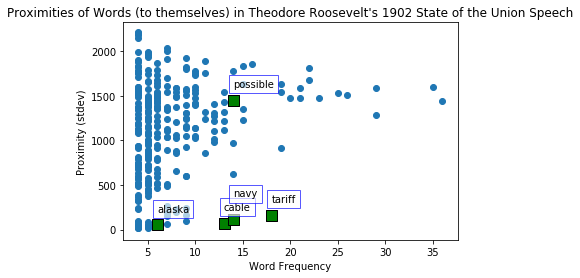

In [29]:
plt.title("Proximities of Words (to themselves) in Theodore Roosevelt's 1902 State of the Union Speech")
plt.xlabel("Word Frequency")
plt.ylabel("Proximity (stdev)")

t= plt.text(6,200,"alaska",fontsize='10')
t.set_bbox(dict(facecolor='white',alpha=.65,edgecolor='blue'))
t= plt.text(14,1600,"possible",fontsize='10')
t.set_bbox(dict(facecolor='white',alpha=.65,edgecolor='blue'))
t= plt.text(18,310,"tariff",fontsize='10')
t.set_bbox(dict(facecolor='white',alpha=.65,edgecolor='blue'))
t= plt.text(13,220,"cable",fontsize='10')
t.set_bbox(dict(facecolor='white',alpha=.65,edgecolor='blue'))
t= plt.text(14,370,"navy",fontsize='10')
t.set_bbox(dict(facecolor='white',alpha=.65,edgecolor='blue'))

plt.scatter(tops_count_RA,indices_stdev_RA)
plt.scatter(6,57.54828890206516,c= 'g',s= 121,marker= 's',edgecolors= 'k')
plt.scatter(14,1453.3862289880983,c='g',s=121,marker='s',edgecolors='k')
plt.scatter(18,159.60015625475813,c='g',s=121,marker='s',edgecolors='k')
plt.scatter(13,73.575867538369323,c='g',s=121,marker='s',edgecolors='k')
plt.scatter(14,122.29672847594233,c='g',s=121,marker='s',edgecolors='k')

plt.show()

Here we can see some areas stand out more than others. "Possible" is at the top of the graph, indicating this term is not found close to other "possible"s in the text. "Alaska","cable","navy", and "tariff" stand out in the bottom, indicating these terms are each used in the same sections of the text.

Cherry-picking some of the more significant terms from the chart above (those used more than 4 times and with a standard deviation of less than 300). This will essentially zoom in on the more interesting words that may indicate a section of the speech.

In [30]:
section_words= []
for i in range(0,len(num_list)):
    if num_list[i][0] > 4:
        if num_list[i][1] <= 300:
            section_words.append([tops_word[i],num_list[i][0],num_list[i][1]])
print(section_words)

[['alaska', 6, 57.54828890206516], ['army', 7, 155.05732975323701], ['cable', 13, 73.575867538369323], ['company', 8, 229.60618458569448], ['cuba', 5, 41.863587997208263], ['district', 5, 79.484841322103676], ['increase', 8, 192.9941708964289], ['indian', 7, 67.758876216496162], ['islands', 9, 166.94584026038777], ['land', 9, 91.42304326320675], ['navy', 14, 122.29672847594233], ['officers', 9, 242.59344642202018], ['philippine', 7, 182.15019593058642], ['principle', 5, 55.136195008360886], ['regulation', 7, 264.8615348688088], ['rural', 5, 26.475649189396659], ['soundings', 5, 20.343057783922259], ['tariff', 18, 159.60015625475813], ['tribes', 5, 55.173906876348717]]


In [31]:
section_count_RA= np.asarray([section_words[i][1] for i in range(0,len(section_words))])
section_stdev_RA= np.asarray([section_words[i][2] for i in range(0,len(section_words))])

Graphing the cherry-picked terms.

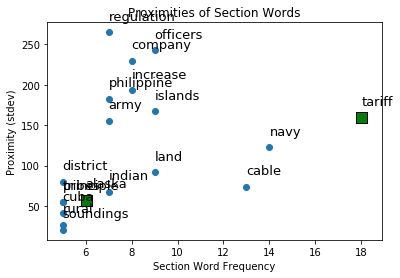

In [32]:
plt.title("Proximities of Section Words")
plt.xlabel("Section Word Frequency")
plt.ylabel("Proximity (stdev)")

for i in range(0,len(section_words)):
    plt.text(section_words[i][1],int(math.ceil(section_words[i][2]+15)),section_words[i][0],fontsize='13')
#plt.text(6,70,"alaska",fontsize='15')
#plt.text(18,170,"tariff",fontsize='15')

plt.scatter(section_count_RA,section_stdev_RA)
plt.scatter(6,57.54828890206516,c= 'g',s= 121,marker= 's',edgecolors= 'k')
plt.scatter(18,159.60015625475813,c='g',s=121,marker='s',edgecolors='k')

plt.show()

# Analysis

"Tariff", "navy", and "cable" are words that particularly stand out. Each of these words has a high frequency and are relatively close together in the speech.

A closer look is needed, but at first glance "tariff" appears to refer to Teddy's anti-trust agenda. Indeed, the 14 instances of "tariff" in the speech align with a paragraph or two, so this method appears to be identifying sections of this speech well.

Teddy's inherent affinity for a strong navy (he gained reknown among military elite for his publishing of 'The Naval War of 1812' in 1882) leads me to believe the term "navy" likely plays a role in several of his speeches, State of the Union and otherwise. Further analysis will need conducted to confirm this, however.

"Cable" seemed like an interesting word for 1902. When I looked this up in the text document, I found this is referring to the Trans-Pacific Cable, a telegraph cable intended to connect America to the Philippines (via Hawaii) and to China and Japan.
<a href=https://en.wikipedia.org/wiki/Commercial_Pacific_Cable_Company>Wikipedia page referring to TPC</a>